In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
#1Import the data and store it in disk space
data = pd.read_csv("./IoTBotNetDataset (1).csv")
data


C:\Users\girid\AppData\Local\Temp\ipykernel_4728\3311392716.py:2: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./IoTBotNetDataset (1).csv")


,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.147,49960,192.168.100.7,80,...,1.127040,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.127040,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP
3,4.0,1.528089e+09,i,1.0,tcp,1.0,192.168.100.147,49964,192.168.100.7,80,...,1.127040,96.0,75.0,1.135140,1.129970,770.0,602.0,1.0,DoS,HTTP
4,5.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49966,192.168.100.7,80,...,1.127040,96.0,75.0,1.135260,1.129970,770.0,602.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998548,998549.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24881,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998549,998550.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24882,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24883,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24884,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP


In [ ]:
#2)Drop the columns not required for your analysis
data1 = data.drop(['proto_number', 'sport', 'dport', 'daddr','AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport'], axis=1)
data1

,pkSeqID,stime,flags,flgs_number,proto,saddr,pkts,bytes,state,state_number,...,TnP_PDstIP,TnP_PerProto,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,192.168.100.147,8.0,1980.0,RST,1.0,...,770.0,772.0,772.0,1.142970,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2.0,1.528089e+09,e,1.0,arp,192.168.100.7,2.0,120.0,CON,2.0,...,2.0,8.0,8.0,0.003857,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,192.168.100.147,8.0,2126.0,RST,1.0,...,770.0,772.0,772.0,1.142970,1.129970,770.0,602.0,1.0,DoS,HTTP
3,4.0,1.528089e+09,i,1.0,tcp,192.168.100.147,8.0,2024.0,RST,1.0,...,770.0,772.0,772.0,1.142970,1.129970,770.0,602.0,1.0,DoS,HTTP
4,5.0,1.528089e+09,e,1.0,UDP,192.168.100.147,8.0,2319.0,RST,1.0,...,770.0,772.0,772.0,1.142970,1.129970,770.0,602.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998548,998549.0,1.528085e+09,e,1.0,udp,192.168.100.149,7.0,420.0,INT,4.0,...,700.0,700.0,700.0,0.269102,0.269102,700.0,700.0,1.0,DoS,UDP
998549,998550.0,1.528085e+09,e,1.0,udp,192.168.100.149,7.0,420.0,INT,4.0,...,700.0,700.0,700.0,0.269102,0.269102,700.0,700.0,1.0,DoS,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,192.168.100.149,7.0,420.0,INT,4.0,...,700.0,700.0,700.0,0.269102,0.269102,700.0,700.0,1.0,DoS,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,192.168.100.149,7.0,420.0,INT,4.0,...,700.0,700.0,700.0,0.269102,0.269102,700.0,700.0,1.0,DoS,UDP


In [ ]:
#3) Do a missing value analysis and perform appropriate steps to correct them 
data.isnull().sum()
data = data.fillna(0)
data.isnull().sum()



pkSeqID                             0
stime                               0
flags                               0
flgs_number                         0
proto                               0
proto_number                        0
saddr                               0
sport                               0
daddr                               0
dport                               0
pkts                                0
bytes                               0
state                               0
state_number                        0
ltime                               0
seq                                 0
dur                                 0
mean                                0
stddev                              0
sum                                 0
min                                 0
max                                 0
spkts                               0
dpkts                               0
sbytes                              0
dbytes                              0
rate        

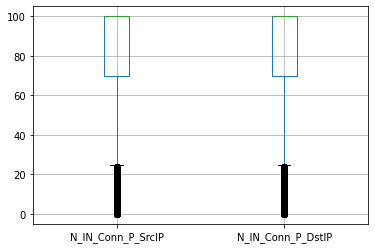

In [ ]:
#4)Perform an outlier analysis for any two columns 
data.boxplot(column=['N_IN_Conn_P_SrcIP', 'N_IN_Conn_P_DstIP'])
plt.show()

In [ ]:
#5)Do a correlation analysis of any two variables
data.corr()


,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
pkSeqID,1.000000,0.082309,-0.398493,0.842548,0.191194,-0.089034,0.601662,0.082309,0.027654,0.034570,...,0.651177,-0.022884,-0.022962,0.038993,0.040632,-0.026808,-0.014036,0.582841,0.584241,0.082289
stime,0.082309,1.000000,0.077369,0.086025,0.035874,0.048200,0.110324,1.000000,0.071600,0.110112,...,0.122509,0.002652,0.002634,0.164959,0.164812,0.003161,0.002676,0.078060,0.078057,1.000000
flgs_number,-0.398493,0.077369,1.000000,-0.492511,-0.059301,0.071806,-0.495272,0.077370,-0.056288,0.291251,...,-0.237765,-0.035450,-0.035225,-0.089071,-0.088398,-0.042259,-0.034492,-0.229555,-0.229180,0.077382
proto_number,0.842548,0.086025,-0.492511,1.000000,0.220208,-0.098754,0.765424,0.086025,-0.054137,-0.106942,...,0.744461,-0.031870,-0.031708,0.025348,0.026091,-0.038715,-0.029804,0.676338,0.677131,0.086002
pkts,0.191194,0.035874,-0.059301,0.220208,1.000000,0.932552,0.144987,0.035874,-0.091473,0.053882,...,0.318190,-0.008928,-0.008933,-0.010636,-0.010961,-0.010596,-0.005358,0.265768,0.265624,0.035869
bytes,-0.089034,0.048200,0.071806,-0.098754,0.932552,1.000000,-0.037703,0.048200,-0.138586,0.173865,...,0.100264,-0.017459,-0.017428,-0.015089,-0.016858,-0.020693,-0.013766,0.040402,0.039155,0.048202
state_number,0.601662,0.110324,-0.495272,0.765424,0.144987,-0.037703,1.000000,0.110324,-0.174641,0.092123,...,0.556301,-0.066940,-0.066552,0.040635,0.041983,-0.080539,-0.063542,0.504176,0.505389,0.110306
ltime,0.082309,1.000000,0.077370,0.086025,0.035874,0.048200,0.110324,1.000000,0.071599,0.110112,...,0.122509,0.002652,0.002634,0.164959,0.164812,0.003161,0.002676,0.078060,0.078057,1.000000
seq,0.027654,0.071600,-0.056288,-0.054137,-0.091473,-0.138586,-0.174641,0.071599,1.000000,-0.595821,...,-0.304902,0.068312,0.067364,0.074181,0.075575,0.082754,0.070191,-0.166714,-0.165759,0.071601
dur,0.034570,0.110112,0.291251,-0.106942,0.053882,0.173865,0.092123,0.110112,-0.595821,1.000000,...,0.169446,-0.109391,-0.108711,-0.066647,-0.065788,-0.130432,-0.105212,0.026272,0.026890,0.110114


In [ ]:
#6)Describe the data 
data.describe()

,pkSeqID,stime,flgs_number,proto_number,pkts,bytes,state_number,ltime,seq,dur,...,TnP_Per_Dport,AR_P_Proto_P_SrcIP,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack
count,998553.000000,9.985530e+05,998553.000000,998553.000000,998553.000000,998553.000000,998553.000000,9.985530e+05,998553.000000,998553.000000,...,998553.000000,998553.000000,998553.000000,998553.000000,998553.000000,998553.000000,998553.000000,998553.000000,998553.000000,998553.000000
mean,499061.037590,1.524630e+09,1.804344,1.761404,6.505672,613.296238,2.819948,1.524630e+09,114329.059466,27.054353,...,648.913558,1.582679,1.587761,83.179251,83.156124,1.585415,1.253801,487.089874,486.887295,0.997741
std,288595.535915,7.255042e+07,1.109576,0.974603,8.630787,605.454228,1.216515,7.255042e+07,75982.142587,11.691454,...,252.091030,28.392884,28.678584,23.994666,24.009329,23.861055,22.287151,296.993097,296.880035,0.047478
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,249639.000000,1.528081e+09,1.000000,1.000000,5.000000,462.000000,1.000000,1.528081e+09,49187.000000,23.998646,...,500.000000,0.177331,0.177331,70.000000,70.000000,0.170895,0.179074,285.000000,285.000000,1.000000
50%,499277.000000,1.528081e+09,2.000000,1.000000,6.000000,616.000000,3.000000,1.528081e+09,101582.000000,26.346249,...,600.000000,0.232105,0.232121,100.000000,100.000000,0.236565,0.231086,400.000000,400.000000,1.000000
75%,748915.000000,1.528085e+09,2.000000,3.000000,8.000000,770.000000,4.000000,1.528085e+09,178949.000000,30.288269,...,781.000000,0.340491,0.340491,100.000000,100.000000,0.340509,0.340874,600.000000,600.000000,1.000000
max,998553.000000,1.528089e+09,6.000000,4.000000,5886.000000,412020.000000,5.000000,1.528090e+09,262212.000000,1555.683960,...,5886.000000,15748.000000,15267.200000,100.000000,100.000000,13245.000000,13245.000000,5886.000000,5886.000000,1.000000


In [ ]:
#7)Display the first 3 rows 
  data.head(3)

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.147,49960,192.168.100.7,80,...,1.12704,96.0,75.0,1.133720,1.129970,770.0,602.0,1.0,DoS,HTTP
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.20000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96.0,75.0,1.135100,1.129970,770.0,602.0,1.0,DoS,HTTP


In [ ]:
#8)Display the last 4 rows
data.tail(4)

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
998549,998550.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24882,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998550,998551.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24883,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998551,998552.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24884,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP
998552,998553.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.149,24885,192.168.100.5,80,...,0.269102,100.0,100.0,0.269107,0.269102,700.0,700.0,1.0,DoS,UDP


In [ ]:
#9)Locate the first row corresponding to the proto as “UDP” 
data.loc[data['proto'] == 'UDP'].head(1)

,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
2,3.0,1.528089e+09,e,1.0,UDP,1.0,192.168.100.147,49962,192.168.100.7,80,...,1.12704,96.0,75.0,1.1351,1.12997,770.0,602.0,1.0,DoS,HTTP


In [ ]:
#10)How many rows of data do you have? 
r,c = data.shape
r

998553

In [ ]:
#11)Display the first 5 columns of the first row 
data.iloc[0:1, 0:5]

,pkSeqID,stime,flags,flgs_number,proto
0,1.0,1.528089e+09,e,1.0,tcp


In [ ]:
#12)Count the number of packets affected  based on flags as “i”
data.loc[data['flags'] == 'i'].count()

pkSeqID                             30
stime                               30
flags                               30
flgs_number                         30
proto                               30
proto_number                        30
saddr                               30
sport                               30
daddr                               30
dport                               30
pkts                                30
bytes                               30
state                               30
state_number                        30
ltime                               30
seq                                 30
dur                                 30
mean                                30
stddev                              30
sum                                 30
min                                 30
max                                 30
spkts                               30
dpkts                               30
sbytes                              30
dbytes                   

In [ ]:
#13)Split the traffic based on traffic into two groups Group 1: pkts<=10 and Group 2:pkts>10 
group1 = data[data['pkts'] <= 10]
group2 = data[data['pkts'] > 10]
print(group1)
print(group2)



         pkSeqID         stime flags  flgs_number proto  proto_number  \
0            1.0  1.528089e+09     e          1.0   tcp           1.0   
1            2.0  1.528089e+09     e          1.0   arp           2.0   
2            3.0  1.528089e+09     e          1.0   UDP           1.0   
3            4.0  1.528089e+09     i          1.0   tcp           1.0   
4            5.0  1.528089e+09     e          1.0   UDP           1.0   
...          ...           ...   ...          ...   ...           ...   
998548  998549.0  1.528085e+09     e          1.0   udp           3.0   
998549  998550.0  1.528085e+09     e          1.0   udp           3.0   
998550  998551.0  1.528085e+09     e          1.0   udp           3.0   
998551  998552.0  1.528085e+09     e          1.0   udp           3.0   
998552  998553.0  1.528085e+09     e          1.0   udp           3.0   

                  saddr  sport            daddr dport  ...  \
0       192.168.100.147  49960    192.168.100.7    80  ...   

In [ ]:
#14)Evaluate the characteristics of the packets  distribution with mean and, deviation (a) Average packets for a given stime (b) Average sbytes for a given stime  (c) Average dbytes for a given stime 
#a)
data.groupby(['stime'])['pkts'].mean()
data.groupby(['stime'])['pkts'].std()





stime
0.000000e+00    0.000000
1.528081e+09    1.020849
1.528081e+09    0.956515
1.528081e+09    1.022364
1.528081e+09    1.151528
                  ...   
1.528089e+09    0.666667
1.528089e+09    0.000000
1.528089e+09    0.554846
1.528089e+09    0.707107
1.528089e+09    0.240772
Name: pkts, Length: 99, dtype: float64

In [ ]:
#b) 
data.groupby(['stime'])['sbytes'].mean()
data.groupby(['stime'])['sbytes'].std()

stime
0                0.000000
1528081322     106.085418
1528081323     134.154711
1528081324     132.715082
1528081325     115.833071
                 ...     
1528088548      68.573156
1528088549      95.268196
1528088550     290.585252
1528088551    1274.206420
1528088552      91.039903
Name: sbytes, Length: 99, dtype: float64

In [ ]:
#c) 
q = data.groupby(['stime'])['dbytes'].mean()
print(q)
p = data.groupby(['stime'])['dbytes'].std()
print(p)


stime
0                0.000000
1528081322      33.132255
1528081323      51.930759
1528081324      53.271446
1528081325      51.975846
                 ...     
1528088548    1337.333333
1528088549     700.000000
1528088550     765.530249
1528088551     700.000000
1528088552    1396.956522
Name: dbytes, Length: 99, dtype: float64
stime
0              0.000000
1528081322    48.864614
1528081323    55.371984
1528081324    56.447805
1528081325    55.346404
                ...    
1528088548    22.000000
1528088549     0.000000
1528088550     5.558132
1528088551     0.000000
1528088552     7.945466
Name: dbytes, Length: 99, dtype: float64


In [ ]:
#15)Compute the mean and the variance of " Pkts_PState_P_Protocol_P_DestIP” for subcategory as HTTP and TCP  
a = data.groupby(['subcategory'])['Pkts_P_State_P_Protocol_P_DestIP'].mean()
print(a)
b = data.groupby(['subcategory'])['Pkts_P_State_P_Protocol_P_DestIP'].var()
print(b)

subcategory
0         0.000000
HTTP    746.097643
TCP     329.842411
UDP     742.008949
Name: Pkts_P_State_P_Protocol_P_DestIP, dtype: float64
subcategory
0           0.000000
HTTP    60446.448007
TCP     21456.481203
UDP     89808.333377
Name: Pkts_P_State_P_Protocol_P_DestIP, dtype: float64


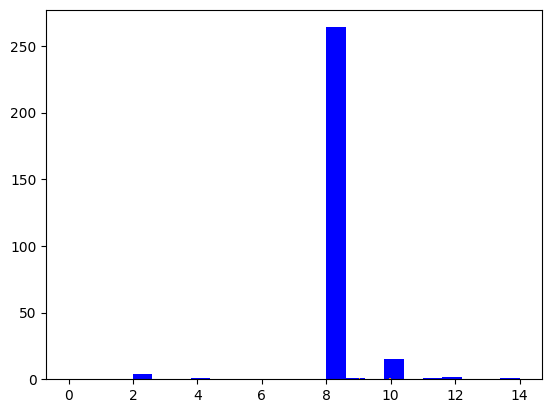

-1.6648228671677376

In [14]:
#16)15.	Draw a histogram for packets with stime as 1528088521, 1528088522., 1528088523. Histogram should be step-filled with bin of size 20. Find the skew of this distribution, and comment if it is positive or negative 
a = data['pkts'][data['stime'] == 1528088521]
b = data['pkts'][data['stime'] == 1528088522]
c = data['pkts'][data['stime'] == 1528088523]
plt.hist(a, bins = 20, color='red')
plt.hist(b, bins=20, color='blue')
plt.hist(c, bins=20, color='orange')
plt.show()

b.skew()
#negative skewed

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1
outliers = data[((data < (q1-1.5*IQR)) | (data > (q3+1.5*IQR)))]





In [17]:
q1 = data['N_IN_Conn_P_SrcIP'].quantile(0.25)
q3 = data['N_IN_Conn_P_SrcIP'].quantile(0.75)
IQR = q3-q1
outliers = data[((data['N_IN_Conn_P_SrcIP'] < (q1-1.5*IQR))
                 | (data['N_IN_Conn_P_SrcIP'] > (q3+1.5*IQR)))]

outliers




,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
76,77.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.148,55062,192.168.100.6,80,...,5586.590000,1.0,22.0,5586.590000,1.129970,2.0,170.0,1.0,DoS,HTTP
77,78.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.6,-1,192.168.100.148,-1,...,0.003857,2.0,1.0,0.005142,0.005142,6.0,2.0,1.0,DoS,HTTP
78,79.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.148,51832,192.168.100.7,80,...,1.127040,96.0,22.0,1.071600,1.129970,770.0,170.0,1.0,DoS,HTTP
79,80.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.148,-1,...,0.003857,2.0,2.0,0.005142,0.005142,6.0,6.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998405,998406.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36902,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP
998406,998407.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36903,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP
998407,998408.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36904,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP
998408,998409.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36905,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP


In [18]:
q1 = data['N_IN_Conn_P_DstIP'].quantile(0.25)
q3 = data['N_IN_Conn_P_DstIP'].quantile(0.75)
IQR = q3-q1
outliers = data[((data['N_IN_Conn_P_DstIP'] < (q1-1.5*IQR))
                 | (data['N_IN_Conn_P_DstIP'] > (q3+1.5*IQR)))]

outliers


,pkSeqID,stime,flags,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
1,2.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.147,-1,...,15267.200000,1.0,2.0,0.005142,0.005142,2.0,6.0,1.0,DoS,HTTP
76,77.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.148,55062,192.168.100.6,80,...,5586.590000,1.0,22.0,5586.590000,1.129970,2.0,170.0,1.0,DoS,HTTP
77,78.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.6,-1,192.168.100.148,-1,...,0.003857,2.0,1.0,0.005142,0.005142,6.0,2.0,1.0,DoS,HTTP
79,80.0,1.528089e+09,e,1.0,arp,2.0,192.168.100.7,-1,192.168.100.148,-1,...,0.003857,2.0,2.0,0.005142,0.005142,6.0,6.0,1.0,DoS,HTTP
146,147.0,1.528089e+09,e,1.0,tcp,1.0,192.168.100.149,45374,192.168.100.5,80,...,5899.710000,1.0,1.0,5899.710000,1.135480,2.0,2.0,1.0,DoS,HTTP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998405,998406.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36902,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP
998406,998407.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36903,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP
998407,998408.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36904,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP
998408,998409.0,1.528085e+09,e,1.0,udp,3.0,192.168.100.148,36905,192.168.100.6,80,...,0.319837,10.0,10.0,0.319837,0.274004,80.0,80.0,1.0,DoS,UDP
